In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
plt.style.use('default')
plt.rc('font', size=18)
plt.rc('axes', titlesize=24)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=18)

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

In [3]:
endpoints = ['add-buy-offer']
dataToPlot = ['apiTime', 'queueSizeBack', 'queueSizeForward']
folders = ['21600s']

In [4]:
hardware12 = '12CPU_30RAM'
hardware8 = '8CPU_20RAM'

In [5]:
tests = ['2repl', '4repl', '5repl', '6repl']

In [13]:
#tests = ['trans_60s', 'trans_120s', 'trans_180s', 'trans_240s', 'trans_300s']

In [6]:
#tests = ['req_250ms', 'req_500ms', 'req_1000ms', 'req_2000ms']

In [7]:
#tests = ['A1_100-A2_100-A3_100', 'A1_200-A3_100', 'A2_200', 'A2_200-A3_100', 'A3_200']

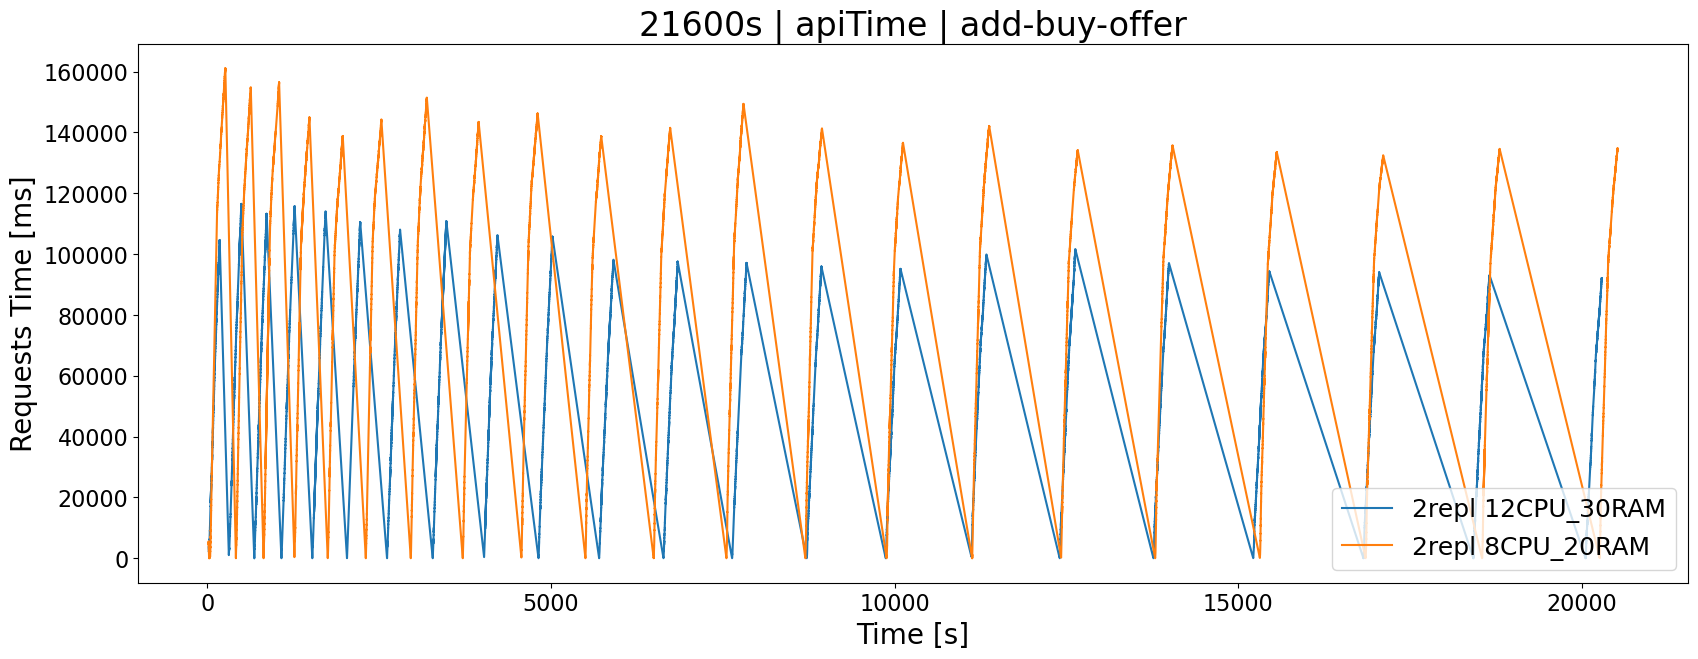

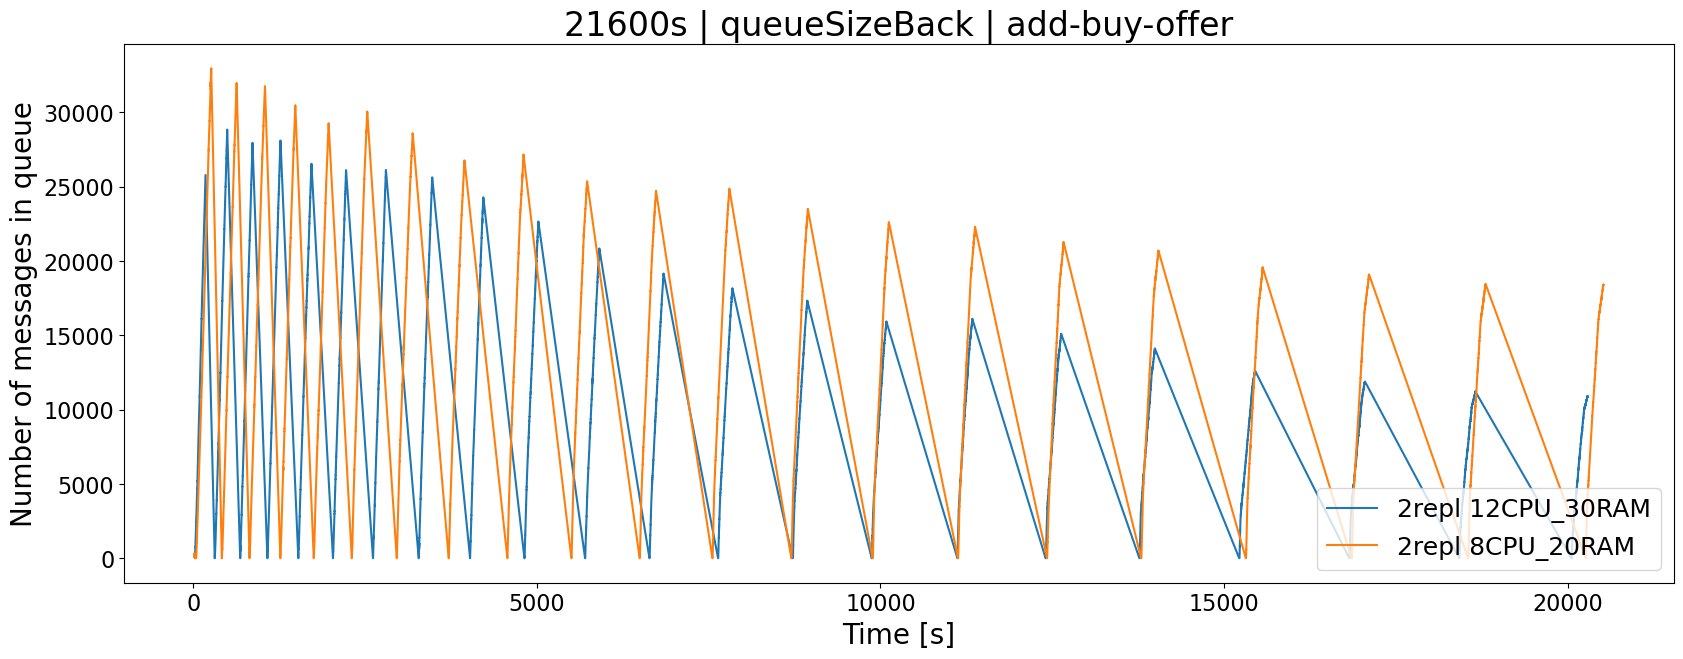

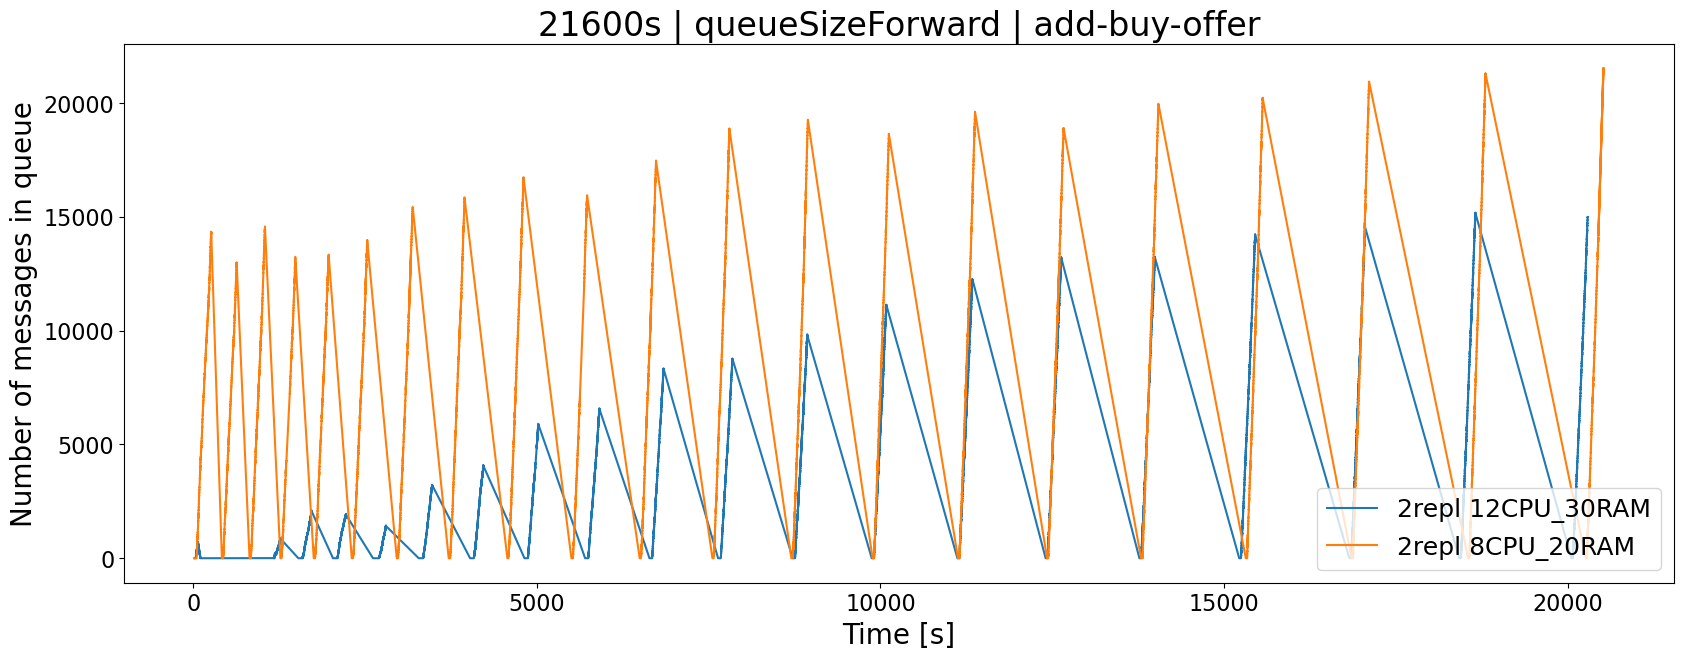

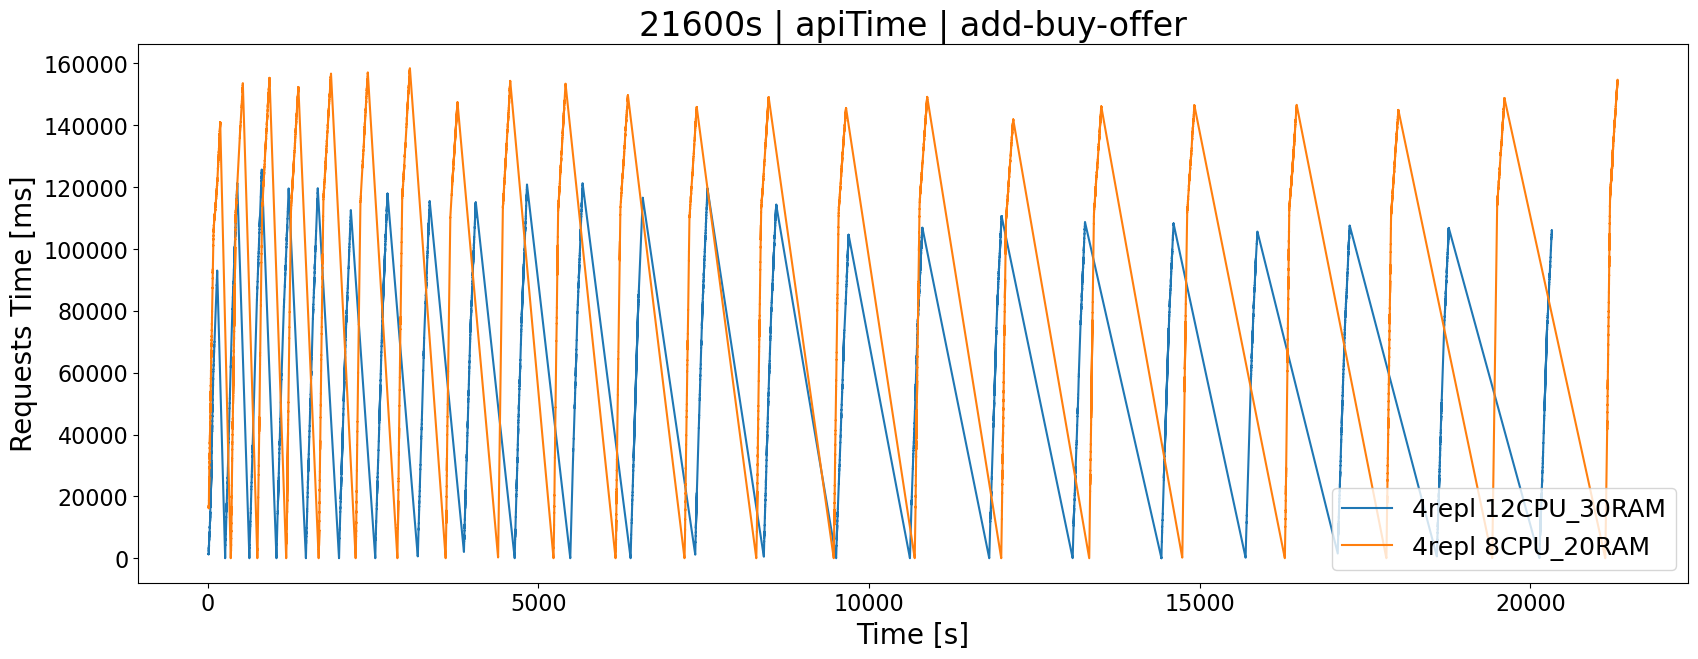

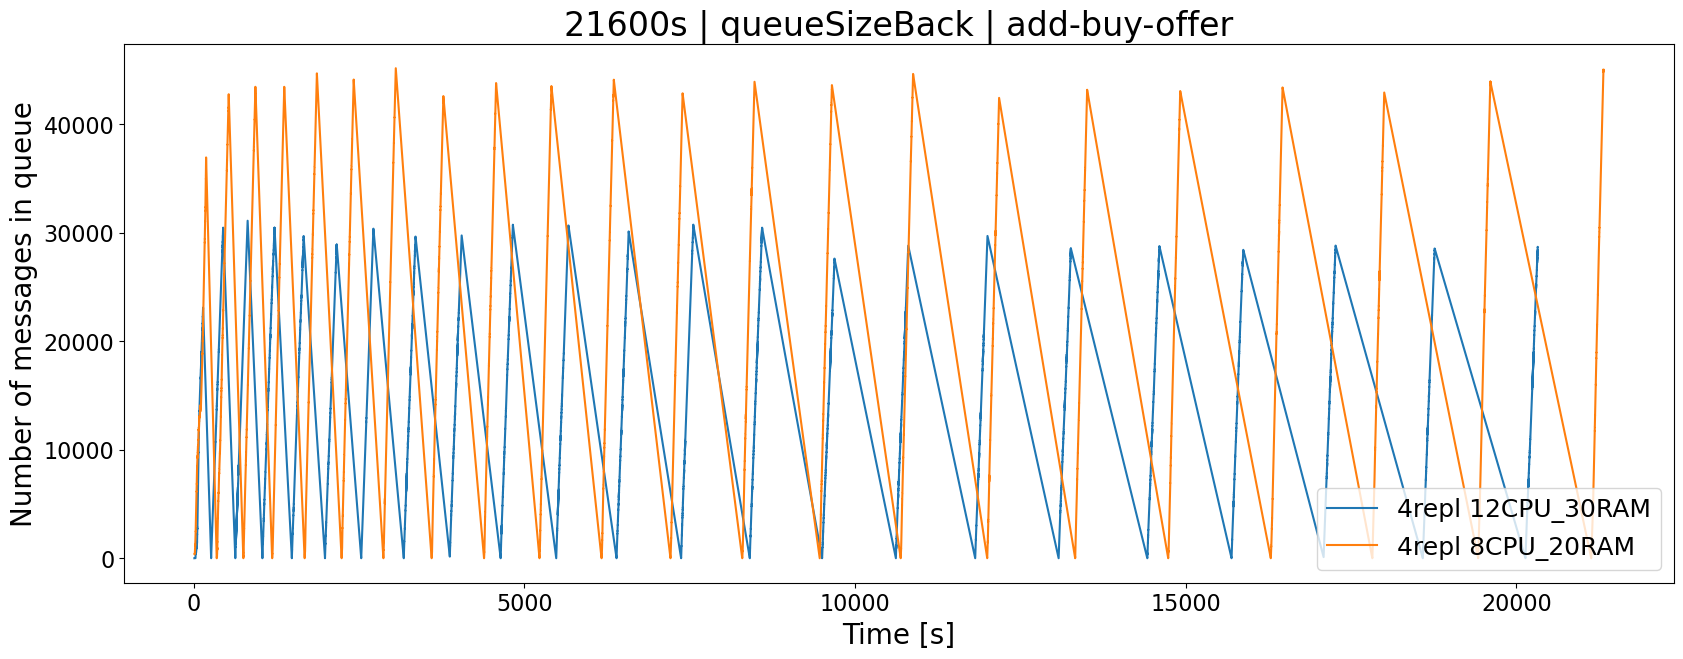

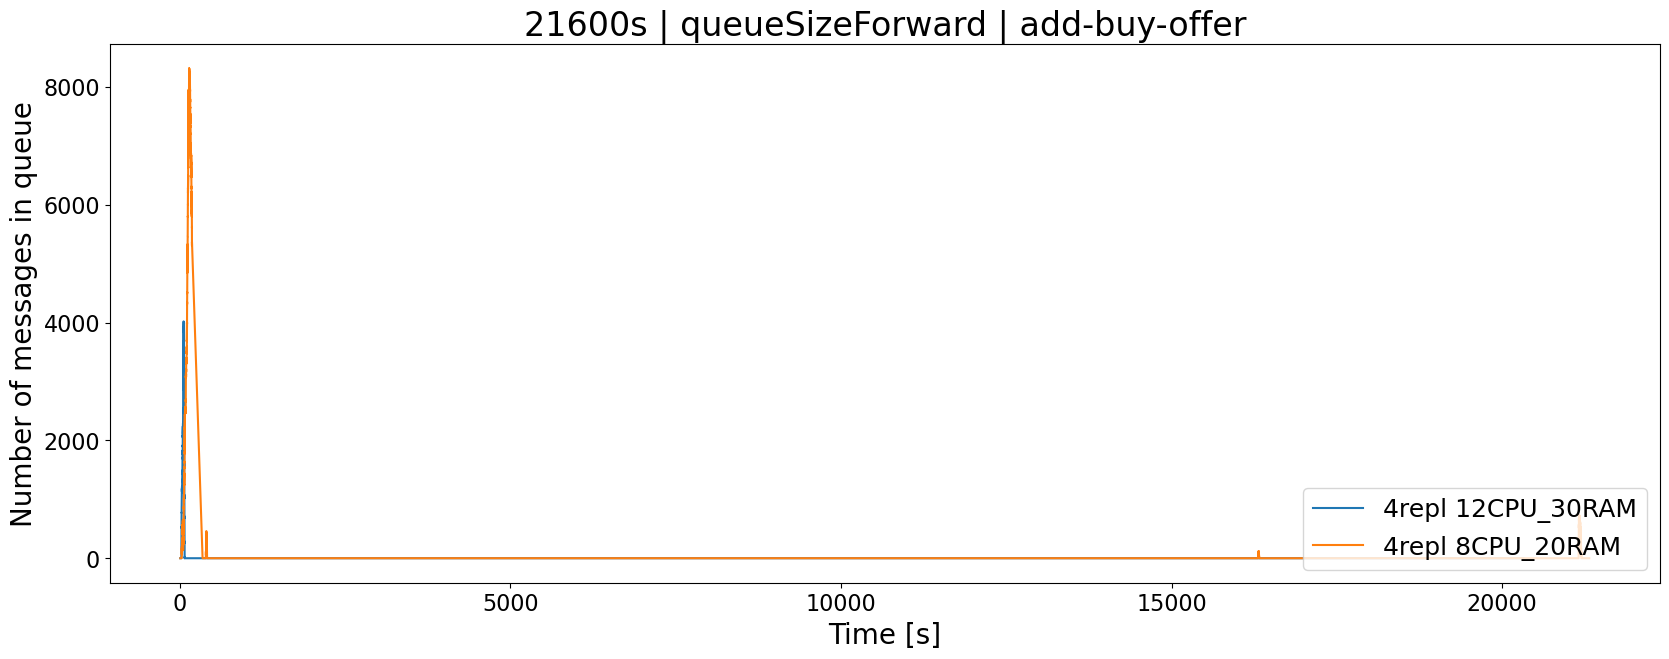

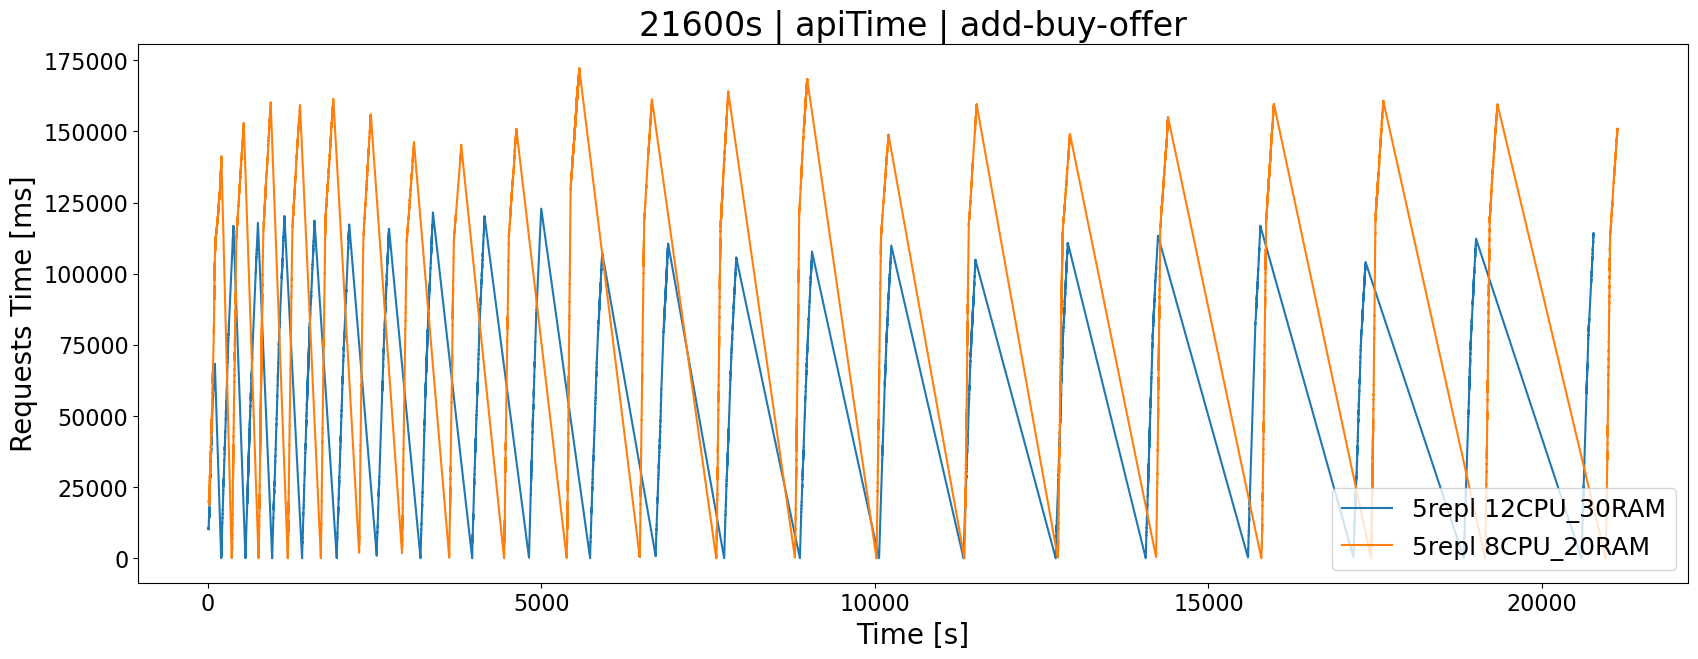

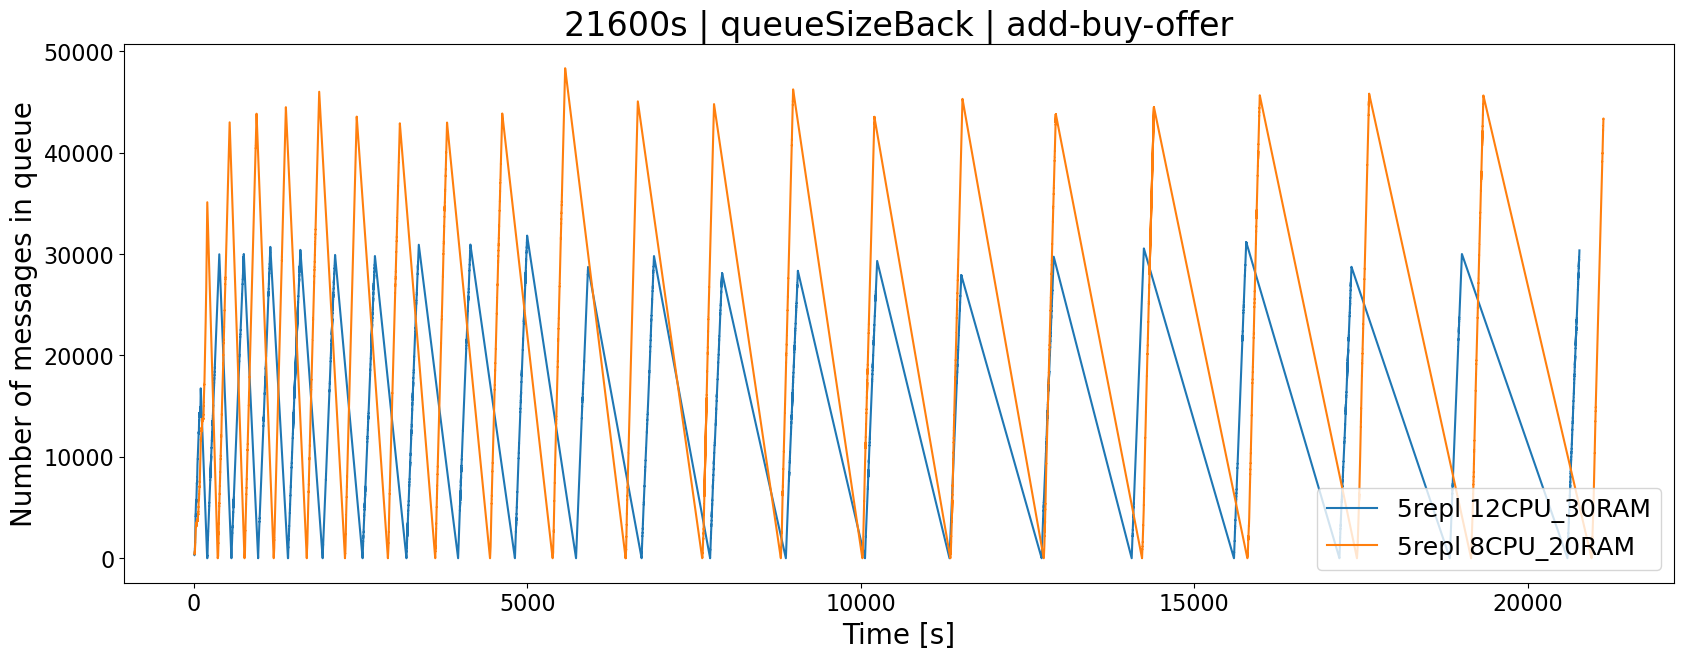

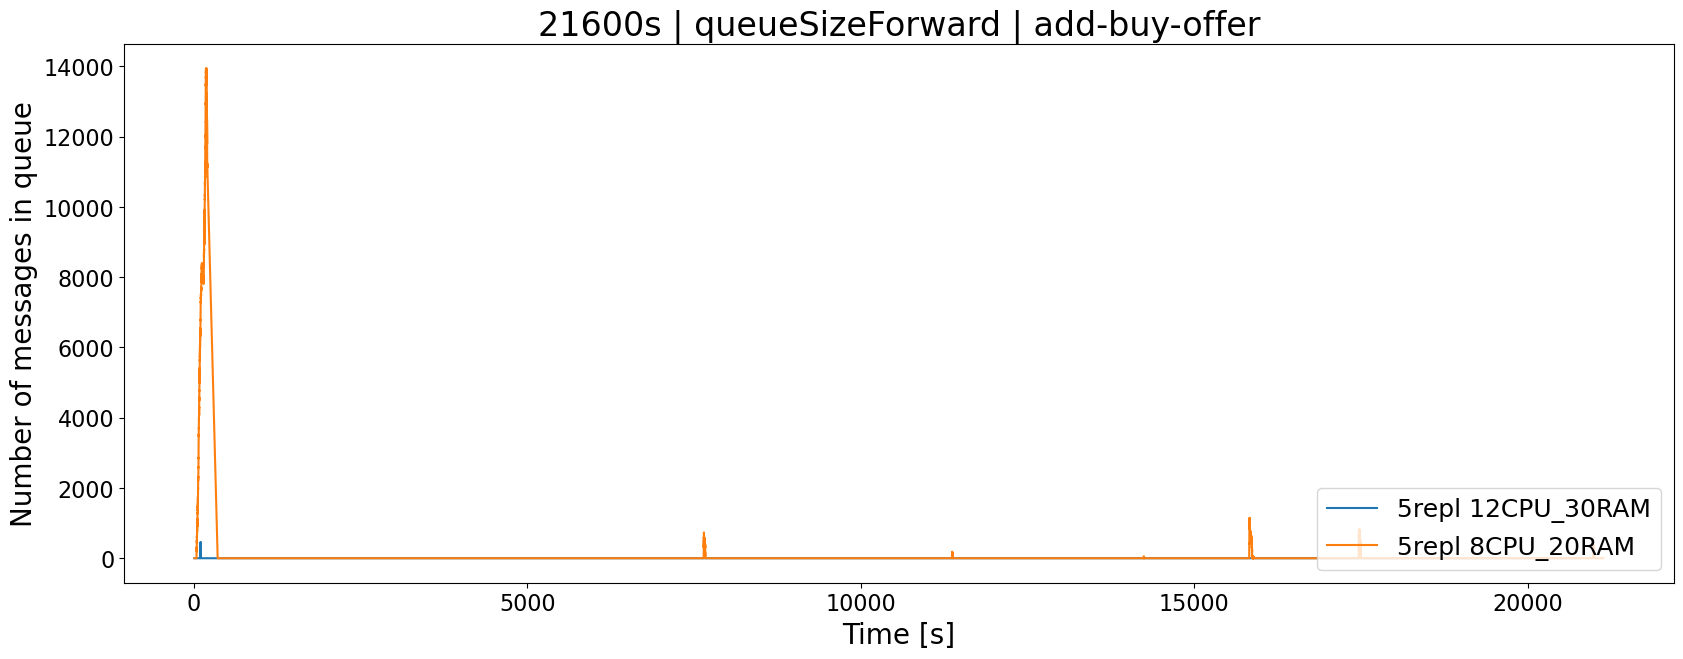

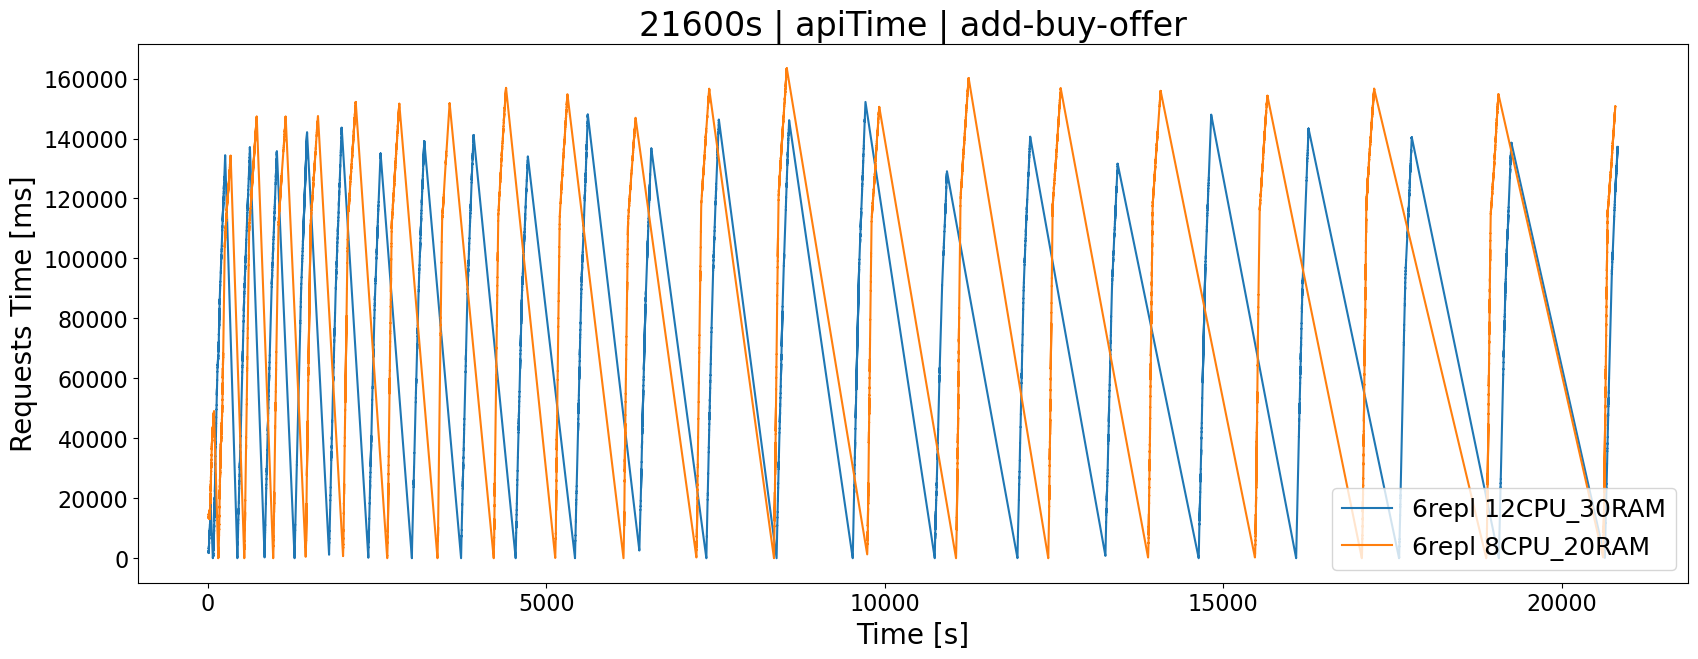

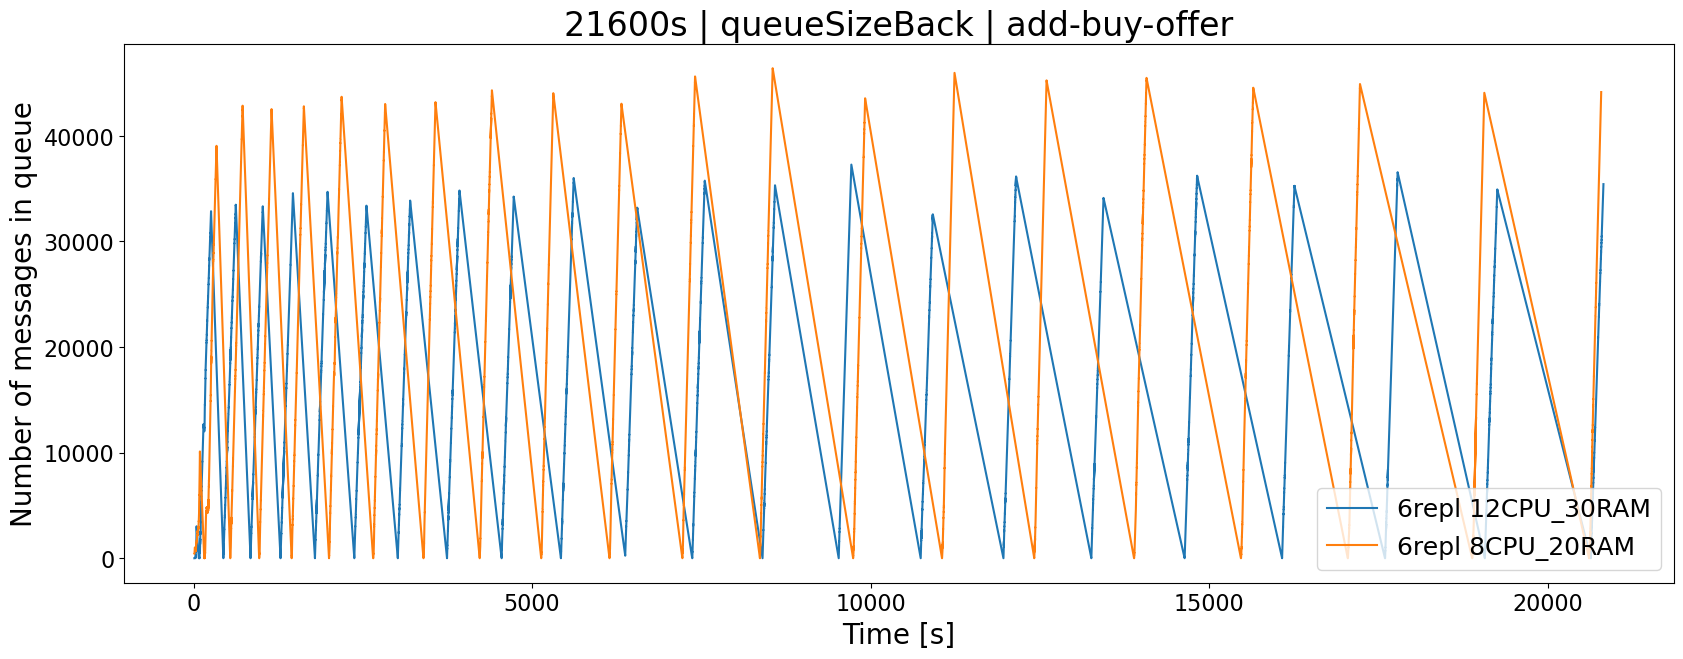

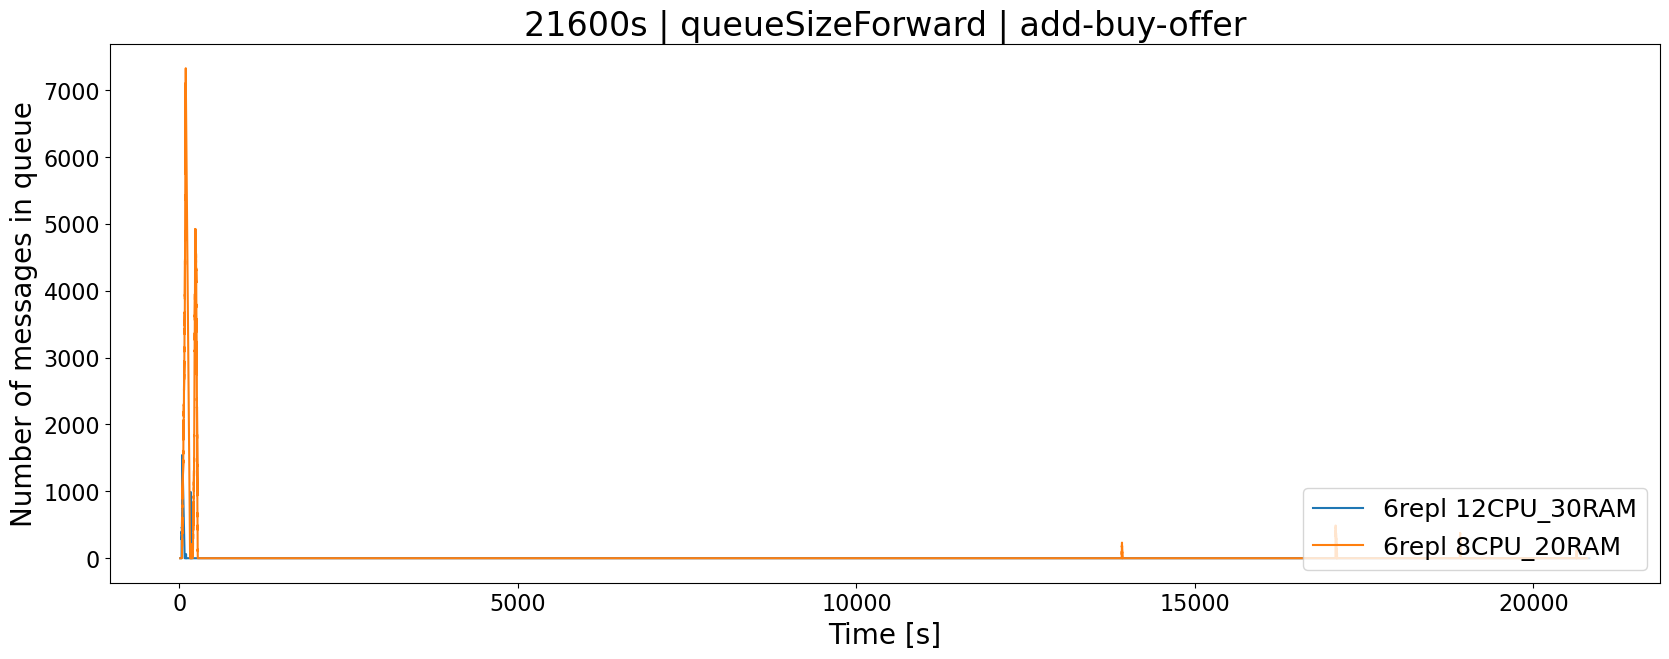

In [6]:
for f in folders:
    for i in tests:
        try:
            d12 = pd.read_csv(hardware12 + '/' + f + '/' + i + '/methods.csv')
            d8 = pd.read_csv(hardware8 + '/' + f + '/' + i + '/methods.csv')
        except:
            continue
        for e in endpoints:
            for j in dataToPlot:  
                data = pd.DataFrame()
                d12 = d12.sort_values(by=['timestamp'])
                d8 = d8.sort_values(by=['timestamp'])
                t = d12['timestamp'][0]
                d12['Time [s]'] = d12['timestamp'].apply(lambda x: (x - t)/1000)
                t = d8['timestamp'][0]
                d8['Time [s]'] = d8['timestamp'].apply(lambda x: (x - t)/1000)
                
                customDataFrame = pd.DataFrame({'Time [s]': d12[(d12['endpointUrl'] == e)]['Time [s]'], i + ' ' + hardware12: d12[(d12['endpointUrl'] == e)][j]})
                customDataFrame = customDataFrame.loc[customDataFrame['Time [s]'] < int(f[:-1])]
                
                data = pd.concat([data, customDataFrame])
                
                customDataFrame = pd.DataFrame({'Time [s]': d8[(d8['endpointUrl'] == e)]['Time [s]'], i + ' ' + hardware8: d8[(d8['endpointUrl'] == e)][j]})
                customDataFrame = customDataFrame.loc[customDataFrame['Time [s]'] < int(f[:-1])]
                
                data = pd.concat([data, customDataFrame])
                
                ax = data.set_index('Time [s]').plot(figsize=(20, 7), title = f + ' | ' + j + ' | ' + e)
                ax.set_xlabel("Time [s]")
                if j == 'apiTime':
                    ax.set_ylabel("Requests Time [ms]")
                else:
                    ax.set_ylabel("Number of messages in queue")

                plt.legend(loc='lower right')